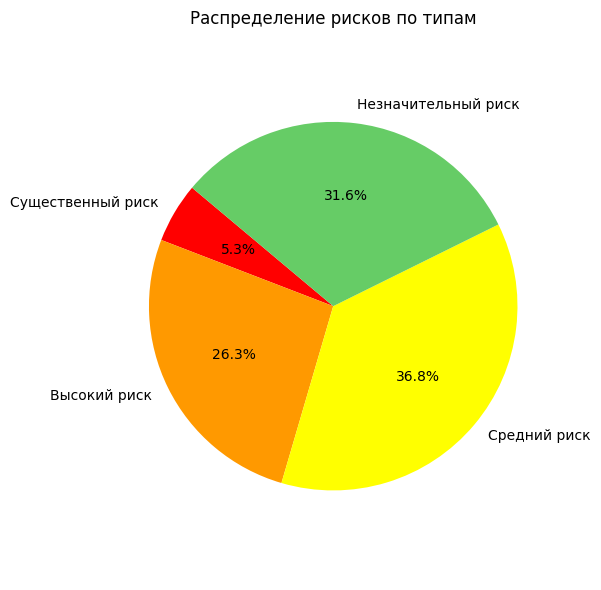

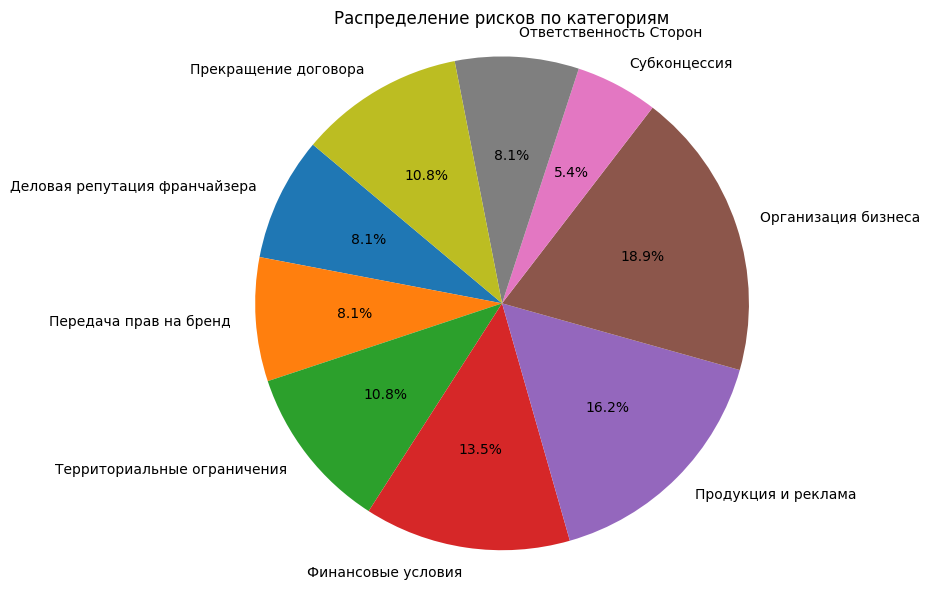

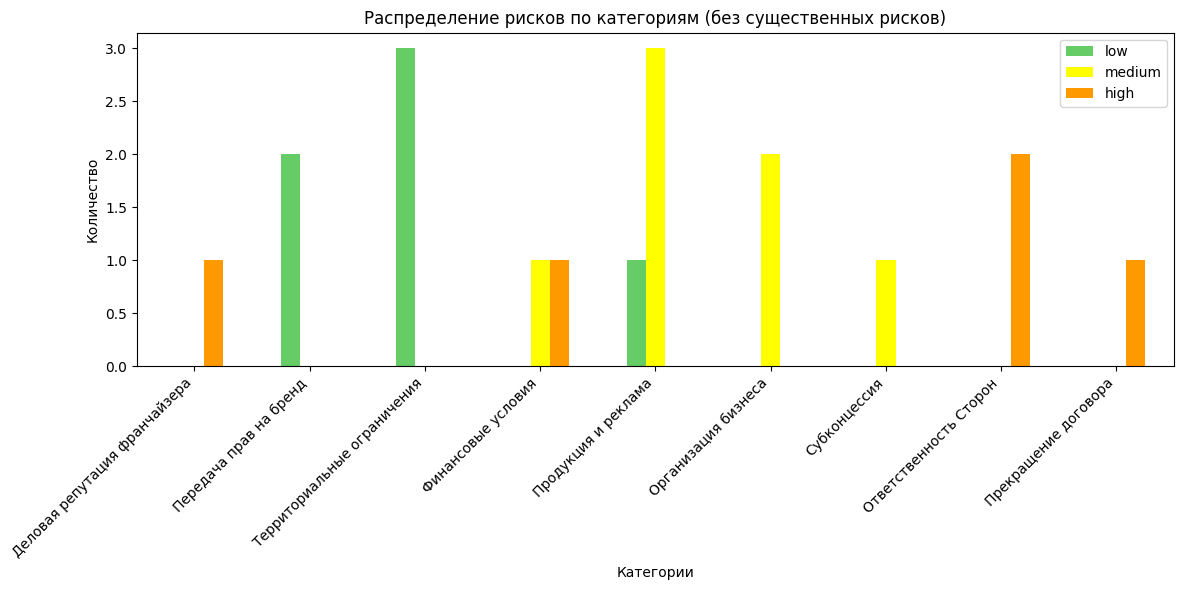

### Высокий риск

- **Вопрос:** Были ли публичные скандалы или негативные новости о франчайзере?
- **Ответ:** Да
- **Рекомендации:** Помните, что Вы покупаете еще и репутацию бренда, в том числе и негативную

- **Вопрос:** Какая форма платежей предусмотрена?
- **Ответ:** Только паушальный
- **Рекомендации:** Такой выбор выплат не свойственен для значительных брендов, так как они ничего не заработают. Такие платежи часто используются при продаже 'Франшиз-пустышек'

- **Вопрос:** Обязан ли франчайзи отвечать за проблемы, которые возникли по вине франчайзера?
- **Ответ:** Да
- **Рекомендации:** Это большой риск быть наказанным за то, к чему Вы не имеете никакого отношения

- **Вопрос:** Даёт ли договор франчайзеру слишком много контроля над вашим бизнесом?
- **Ответ:** Да
- **Рекомендации:** Вероятно это приведет к чрезмерному контролю, который будет тормозить и усложнять развитие Вашего бизнеса

- **Вопрос:** Есть ли особые условия расторжения (отличающиеся от закона)?
- **Ответ:** Нет
- **Рекомендации:** Они могут быть использованы Вашим партнером для досрочного прекращения договора в свою пользу, что нанесет непоправимый ущерб бизнесу

### Средний риск

- **Вопрос:** Можно ли изменить размер платежей по соглашению сторон?
- **Ответ:** Нет
- **Рекомендации:** Для Вас и Вашего партнера может быть необходимо поменять размер выплат из-за изменений на рынке (снижение средних цен, инфляция и прочее)

- **Вопрос:** В договоре не указано, какие рекламные материалы необходимо использовать для рекламы?
- **Ответ:** Да
- **Рекомендации:** У вашего партнера должны быть готовые макеты для рекламных материалов. Вы сможете сэкономить свое время на изготовление рекламы, а правообладатель будет знать, что реклама соответствует всем его стандартам

- **Вопрос:** Может ли франчайзер без вашего согласия изменить требования к рекламе?
- **Ответ:** Да
- **Рекомендации:** В целом это его право, поскольку реклама всегда задействует бренд правообладателя, но для Вас это может привести к финансовым потерям при постоянной и бесконтрольной смене маркетинговой политики

- **Вопрос:** Можете ли вы выбирать поставщиков сами, или франчайзер заставляет вас покупать только у "своих"?
- **Ответ:** Да
- **Рекомендации:** Вы становитесь ограниченными только конкретными поставщиками, которые могут оказаться ненадежными

- **Вопрос:** Есть ли в тексте договора условие про ремонт помещения / его дизайн / переоборудование?
- **Ответ:** Нет
- **Рекомендации:** У Вас становиться больше шанс возникновения споров по поводу внешнего вида и кухни Вашего предприятия

- **Вопрос:** Регулирует ли правообладатель работу и подготовку персонала?
- **Ответ:** Нет
- **Рекомендации:** Первое время Вам может быть трудно обучить персонал самостоятельно, чтобы соответствовать всем стандартам бренда

- **Вопрос:** Есть ли отдельное соглашение о таких передачах?
- **Ответ:** Нет
- **Рекомендации:** Лучше сразу договориться с партнером о том, на каких условиях вы будете продавать бренд, чтобы избежать споров

,Тип риска,Количество
0,Существенный риск,1
1,Высокий риск,5
2,Средний риск,7
3,Незначительный риск,6


In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Markdown


with open("data.json", encoding="utf-8") as f:
    data = json.load(f)

# Повторное определение перевода уровней рисков
risk_labels = {
    "significant": "Существенный риск",
    "high": "Высокий риск",
    "medium": "Средний риск",
    "low": "Незначительный риск"
}

# Повтор визуализаций и аналитики
# Таблица по типам рисков
risk_type_table = pd.DataFrame({
    "Тип риска": [risk_labels[k] for k in data["by_risk_type"]],
    "Количество": [v["count"] for v in data["by_risk_type"].values()]
})

# Круговая диаграмма по типам рисков
plt.figure(figsize=(6, 6))
plt.pie(risk_type_table["Количество"], labels=risk_type_table["Тип риска"], autopct="%1.1f%%",
        colors=["#FF0000", "#FF9900", "#FFFF00", "#66CC66"], startangle=140)
plt.title("Распределение рисков по типам")
plt.axis("equal")
plt.tight_layout()
plt.show()

# Круговая диаграмма по категориям
category_totals = {k: v["total"] for k, v in data["by_category"].items()}
plt.figure(figsize=(8, 6))
plt.pie(category_totals.values(), labels=category_totals.keys(), autopct="%1.1f%%",
        startangle=140)
plt.title("Распределение рисков по категориям")
plt.axis("equal")
plt.tight_layout()
plt.show()

# Столбчатая диаграмма по категориям без значительных
category_risks_df = pd.DataFrame(data["by_category"]).T
category_risks_df = category_risks_df[["low", "medium", "high"]]

category_risks_df.plot(kind="bar", stacked=False, figsize=(12, 6),
                       color=["#66CC66", "#FFFF00", "#FF9900"])
plt.title("Распределение рисков по категориям (без существенных рисков)")
plt.xlabel("Категории")
plt.ylabel("Количество")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Рекомендации
def render_risk_details(level):
    details = data["by_risk_type"][level]["details"]
    if not details:
        return
    display(Markdown(f"### {risk_labels[level]}"))
    for d in details:
        display(Markdown(
            f"- **Вопрос:** {d['question']}\n"
            f"- **Ответ:** {d['answer']}\n"
            f"- **Рекомендации:** {', '.join([r.strip() for r in d['recommendations']])}"
        ))

for level in ["high", "medium"]:
    render_risk_details(level)

# Возвращаем таблицу
risk_type_table
